# Librairies

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import statistics as s
import nltk as n
from nltk.corpus import stopwords

# joindre les deux ficheirs .csv en un seul dataset

In [26]:
#joindre les deux datasets
###lire les noms des dataset depuis le dossier
files= [file for file in os.listdir(r"C:\Users\user\Desktop\projet python\datasets")]
print(files)
#creer une dataset "donnees" contenant les donnees des deux dataset
donnees= pd.DataFrame()

#lire les noms des datasets
for file in files:
    df = pd.read_csv(r'C:\Users\user\Desktop\projet python\datasets/'+file)
    donnees=[donnees,df]
    #concatener les fichier en un seul dataset
    donnees = pd.concat(donnees)

#sauvegarder le nouveau dataset
donnees.to_csv(r'C:\Users\user\Desktop\projet python\donnees.csv', index = True)

#afficher les 5 premieres et dernieres lignes du dataset
donnees.head()
donnees.head(-5)

#saugarder les deux dataset
df1= pd.read_csv(r"C:\Users\user\Desktop\projet python\datasets\dataset1.csv")
df2= pd.read_csv(r"C:\Users\user\Desktop\projet python\datasets\dataset2.csv") 
df2.describe()

['dataset1.csv', 'dataset2.csv']


,Unnamed: 0
count,425.000000
mean,224.084706
std,125.526786
min,0.000000
25%,118.000000
50%,226.000000
75%,332.000000
max,438.000000


# Collectionner les diffèrents attributs des colonnes:

In [3]:
#Selectionner la colonne voulue:
industry_sector =df2['Industry Sector']
industry_sector_list=[]

#Collenction des attribut de la colonne voulue dans un liste pour l'utiliser en suite:
for i in industry_sector:
    if i in industry_sector_list:
        None
    else:
        industry_sector_list.append(i)
        
print(industry_sector_list)


['Mining', 'Metals', 'Others']


# Graphe representant la portion des accidents par pays:

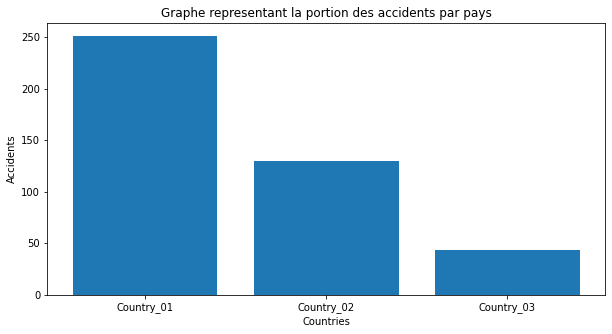

In [32]:
#graphe representant la portion des accidents par pays:

#Grouper le dataset en factions des pays:
#Le reset_index nous permettera d'utiliser la colonne de trie afin de l'utiliser pour notre plot: 
temp=df2.groupby('Countries').count().reset_index()

#Tracer le diagrammes en barre des nombre accidents par pays:
plt.figure(figsize=(10,5))
plt.bar(temp['Countries'],temp['Data'])
plt.title('Graphe representant la portion des accidents par pays')
plt.xlabel('Countries')
plt.ylabel('Accidents')
plt.show()




In [30]:
temp=df2.groupby('Countries').count().reset_index()
temp

,Countries,Unnamed: 0,Data,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,Country_01,251,251,251,251,251,251,251,251,251,251
1,Country_02,130,130,130,130,130,130,130,130,130,130
2,Country_03,44,44,44,44,44,44,44,44,44,44


# #Graphe representant la portion des accidents par secteur

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...,...
420,434,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
421,435,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
422,436,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
423,437,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...


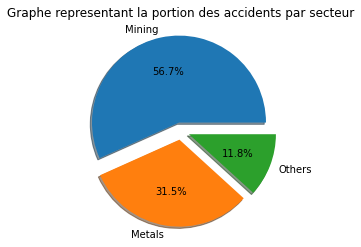

In [34]:
#graphe representant la portion des accidents par secteur

#On trie les valeurs suivant la colonne 'Data' afin d'avoir la bonne représentation d'apres les listes des labels utilisées:
secteur= df2.groupby('Industry Sector').count().sort_values(by=['Data'],ascending = False).reset_index()

#Represnetation par diagramme des secteur
plt.pie(secteur['Data'], labels= secteur['Industry Sector'], autopct='%1.1f%%', shadow = True, explode = [0.1, 0.1, 0.1], radius = 1) 
plt.title("Graphe representant la portion des accidents par secteur")

# Graphe representant la proportion des accidents par genre :

Le nombre d'accident subis par les males =  403
Le nombre d'accident subis par les femelles =  22


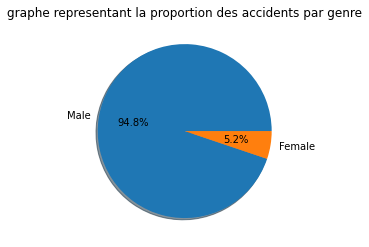

In [6]:
#graphe representant la proportion des accidents par genre :

genre=df2.groupby('Genre').count().sort_values(by=['Data'], ascending = False).reset_index()

#Representation en diagramme des secteurs:
plt.pie(genre['Data'], labels = genre['Genre'], autopct='%1.1f%%', shadow = True)
plt.title('graphe representant la proportion des accidents par genre')

print("Le nombre d'accident subis par les males = ",genre.loc[0,'Data'])
print("Le nombre d'accident subis par les femelles = ",genre.loc[1,'Data'])

# Graphe representant la répartition d'accident par Local

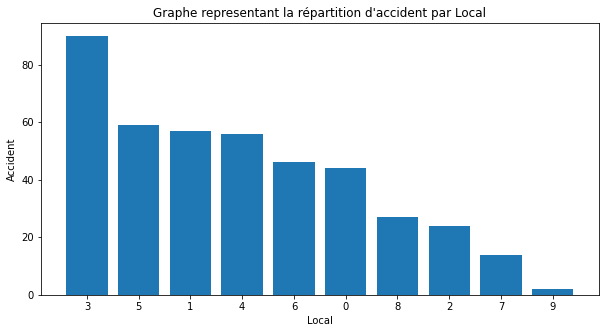

La moyenne d'accident par local =  35.416666666666664
12


In [37]:
#Graphe representant la répartition d'accident par Local
local = df2.groupby('Local').count().sort_values(by=['Data'], ascending = False).reset_index()


#Extraire les nombres des locaux
locals = []
for x in local['Local']:
    locals.append(x[7:])
#Tracer le graphe en barres: 
plt.figure(figsize=(10,5))
plt.bar(locals,local['Data'])
plt.xlabel("Local")
plt.ylabel("Accident")
plt.title("Graphe representant la répartition d'accident par Local")
plt.show()

print("La moyenne d'accident par local = ",s.mean(local['Data']))

In [8]:
df2.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


# Classification par risque critique: 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

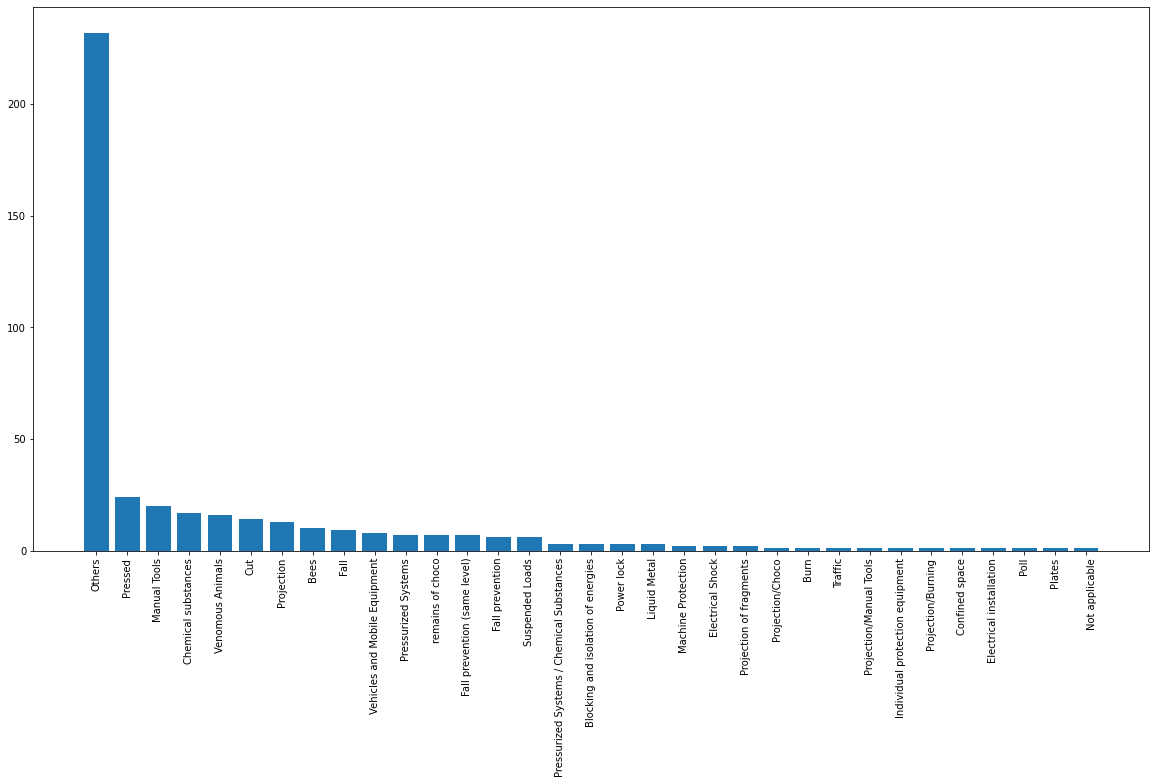

In [9]:
risk=df2.groupby('Critical Risk').count().sort_values(by=['Data'], ascending = False).reset_index()

#Representation en diagramme secteur:
plt.figure(figsize=(20,10))
plt.bar(risk['Critical Risk'],risk['Data'])
plt.xticks(rotation = 'vertical')

# Repartition des accidents subis par des employees ou des interimaires:

Text(0.5, 1.0, 'Repartition des accidents subis par des employees ou des interimaires')

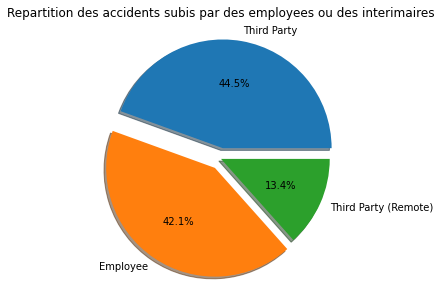

In [10]:
interi=df2.groupby('Employee or Third Party').count().sort_values(by = ['Data'], ascending = False).reset_index()
plt.figure(figsize=(10,5))
plt.pie(interi['Data'], labels =interi['Employee or Third Party'], autopct='%1.1f%%', shadow = True, explode=[0.1, 0.1, 0])
plt.title('Repartition des accidents subis par des employees ou des interimaires')

# Y' a t-il une correlation en le niveau d'accident et le niveau potentiel d'accident?

Text(0.5, 1.0, "Graphe en Baton representant la recurrence des accidents selon le niveau d'accident enregistré et le niveau potentiel d'accident dans un secteur")

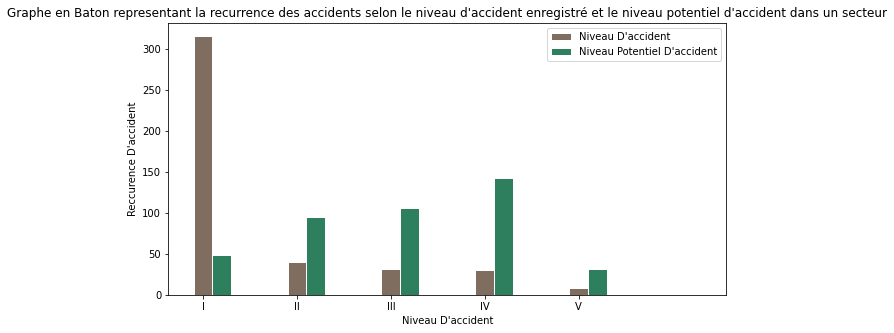

In [11]:
#Extraction des données nécessaires pour tracer le graphe en baton

accident_level= df2.groupby('Accident Level').count().sort_values(by=['Data'],ascending = False).reset_index()

pot_accident_level= df2.groupby('Potential Accident Level').count().sort_values(by = ['Data'], ascending = False).reset_index()

df_al=accident_level.loc[:,'Accident Level': 'Data']
df_pal = pot_accident_level.loc[:, 'Potential Accident Level': 'Data']

df_al = df_al.sort_values(by=['Accident Level'], ascending= True).reset_index()
df_pal= df_pal.sort_values(by=['Potential Accident Level'], ascending= True).reset_index()


#Digramme en batons (groupe):

l_bar = 0.2

bar1 = df_al['Data']
bar2 = df_pal['Data']


#Positions des bars sur l'axe des X:

r1=np.arange(len(bar1) +1)
r2=[(x + l_bar) for x in r1]
r11=np.arange(len(bar1))
#Plot:
plt.figure(figsize=(10,5))
plt.bar(r11, bar1,color='#7f  6d5f', width=l_bar, edgecolor='white', label="Niveau D'accident")

plt.bar(r2, bar2,color='#2d7f5e', width=l_bar, edgecolor='white', label="Niveau Potentiel D'accident")

plt.xlabel("Niveau D'accident")
plt.xticks([x for x in range(len(bar1))],['I','II','III','IV','V'])
plt.ylabel("Reccurence D'accident")
plt.legend()
plt.title("Graphe en Baton representant la recurrence des accidents selon le niveau d'accident enregistré et le niveau potentiel d'accident dans un secteur")

# #Reccurence des accidents par mois et l'année :

Text(0.5, 1.0, 'Graphe en Baton representant la recurrence des accidents selon les mois 1 jusqu au mois 7 entre 2016 et 2017.')

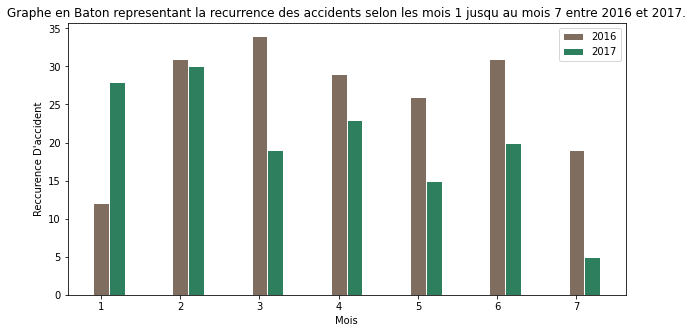

In [12]:
#Reccurence des accidents par mois et l'année :

#Année
df2['Année']=df2['Data'].str[:4]
#Mois:
df2['Mois'] = df2['Data'].str[5:7]
df2.head()

#On va essayer de compoarer la réccurence d'accidents pendant chaque mois entre 2016 et 2017 :

        #on commence par l'annee 2016
annee_2016=df2.loc[df2['Année']=='2016'].groupby('Mois').count().reset_index()
        #On passe a lanne 2017
annee_2017=df2.loc[df2['Année']=='2017'].groupby('Mois').count().reset_index()


#Diagramme en baton pour comparer les 7 mois entre 2016 et 2017:

l_bar = 0.2

bar1 = annee_2016['Data'][0:7]
bar2 = annee_2017['Data'][0:7]


#Positions des bars sur l'axe des X:

r1=np.arange(len(bar1))
r2=[(x + l_bar) for x in r1]
r11=np.arange(len(bar1))
#Plot:
plt.figure(figsize=(10,5))
plt.bar(r11, bar1,color='#7f6d5f', width=l_bar, edgecolor='white', label="2016")

plt.bar(r2, bar2,color='#2d7f5e', width=l_bar, edgecolor='white', label="2017")

plt.xlabel("Mois")
plt.xticks([x for x in range(len(bar1))],[i for i in range(1,8)])
plt.ylabel("Reccurence D'accident")
plt.legend()
plt.title("Graphe en Baton representant la recurrence des accidents selon les mois 1 jusqu au mois 7 entre 2016 et 2017.")

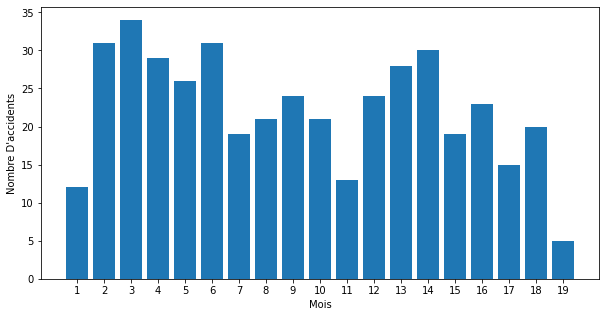

La moyenne des accidents par mois pour l'année 2016 =  23.75
La moyenne des accident pour les 7 premier mois de 2016 =  26 
La moyenne des accidens pour les 7 premiers mois de 2017 =  20


In [13]:
#on trace le graphe des 19 mois :

merge_mois =pd.concat([annee_2016['Data'],annee_2017['Data']],axis =0)
plt.figure(figsize=(10,5))
plt.bar([x for x in range(1,20)],merge_mois)

plt.xlabel('Mois')
plt.ylabel("Nombre D'accidents")
plt.xticks([x for x in range (1,20)], [x for x in range(1,20)])
plt.show()
print("La moyenne des accidents par mois pour l'année 2016 = ",s.mean(annee_2016['Data']))
print("La moyenne des accident pour les 7 premier mois de 2016 = ",s.mean(annee_2016['Data'][:7]),"\nLa moyenne des accidens pour les 7 premiers mois de 2017 = ",s.mean(annee_2017['Data']))

# On considere maintenant la proportion des accidents (males/femelles) par secteur

([<matplotlib.axis.XTick at 0x1812d478>,
 [Text(0.2, 0, 'Femelle'), Text(1.2, 0, 'Male')])

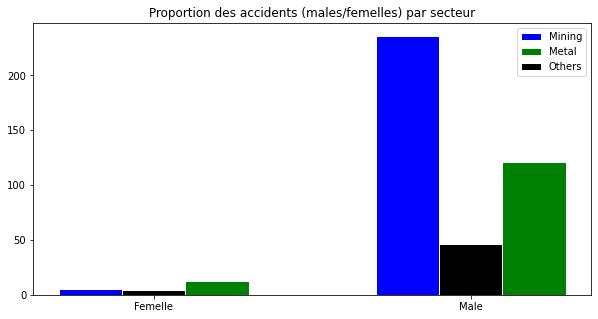

In [14]:
# On selectionne les colonnes necessaires :
sec_genre = df2.loc[:,'Industry Sector': 'Genre']
sec_genre.drop(columns =['Accident Level','Potential Accident Level'],inplace = True)


sec_genre=sec_genre.groupby(['Genre','Industry Sector'])['Industry Sector'].count().unstack().reset_index()

sec_genre.head()


#pLot
l=0.2

min_g=[x for x in range(2)]
oth_g=[x+l for x in range(2)]
met_g=[x+2*l for x in range(2)]
plt.figure(figsize=(10,5))
plt.bar(min_g,sec_genre['Mining'],color='blue', width=l, edgecolor='white', label="Mining")
plt.bar(met_g,sec_genre['Metals'],color='green', width=l, edgecolor='white', label="Metal")
plt.bar(oth_g,sec_genre['Others'],color='Black', width=l, edgecolor='white', label="Others")

plt.legend()
plt.title('Proportion des accidents (males/femelles) par secteur')
plt.xticks([x/10 for x in range(2,13,10)],['Femelle','Male'])

# Le niveau d'accidents subis par les males:

********************************* Le nombre total des accidents subis par les hommes =   403.0  *********************

Le nombre total des accidents de niveaux  I  subis par les hommes =   298.0
Le nombre total des accidents de niveaux  II  subis par les hommes =   37.0
Le nombre total des accidents de niveaux  III  subis par les hommes =   30.0
Le nombre total des accidents de niveaux  IV  subis par les hommes =   30.0
Le nombre total des accidents de niveaux  V  subis par les hommes =   8.0

******************************** Le nombre total des accidents subis par les femmes =   22.0  ***********************

Le nombre total des accidents de niveaux  I  subis par les femmes =   18.0
Le nombre total des accidents de niveaux  II  subis par les femmes =   3.0
Le nombre total des accidents de niveaux  III  subis par les femmes =   1.0


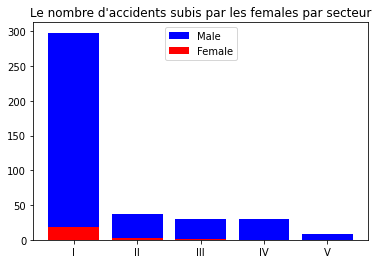

In [15]:
lev_mal=df2.loc[:,'Accident Level':'Genre']
lev_mal.drop(columns = 'Potential Accident Level', inplace = True)

#lev_mal=lev_mal.groupby(['Genre'])

lev_mal = lev_mal.groupby(['Accident Level','Genre'])['Genre'].count().unstack().reset_index()

#Les statistiques :
  
print("********************************* Le nombre total des accidents subis par les hommes =  ",sum(lev_mal['Male'])," *********************\n")
i = 0
for i in range(len(lev_mal['Male'])):
    print("Le nombre total des accidents de niveaux ",lev_mal['Accident Level'][i]," subis par les hommes =  ",lev_mal['Male'][i])

plt.bar(lev_mal['Accident Level'],lev_mal['Male'],color = 'Blue',label = 'Male')
plt.title("Le nombre d'accidents subis par les males par secteur ")

#Supprimer les lignes ayant un manque d'info pour les femelles :
lev_fem=lev_mal['Female'].dropna()
lev_fem
print("\n******************************** Le nombre total des accidents subis par les femmes =  ",sum(lev_fem),' ***********************\n')
i = 0
for i in range(len(lev_fem)):
    print("Le nombre total des accidents de niveaux ",lev_mal['Accident Level'][i]," subis par les femmes =  ",lev_fem[i])

plt.bar(lev_mal['Accident Level'],lev_mal['Female'],color = 'red', label = 'Female')
plt.title("Le nombre d'accidents subis par les females par secteur")
plt.legend()
    


# Reccurence d'accidents par jours :

Graphe representant la récurrence d'accidents par secteur pour le Vendredi


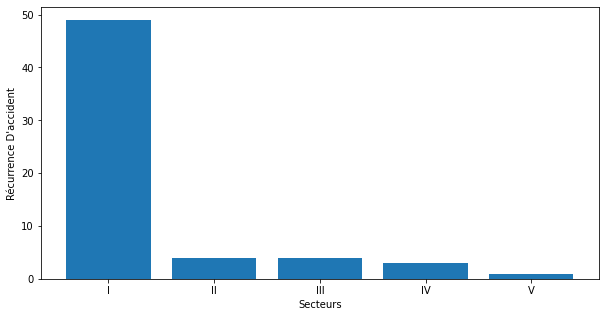

count     61
unique     5
top        I
freq      49
Name: Accident Level, dtype: object 

Graphe representant la récurrence d'accidents par secteur pour le Samedi


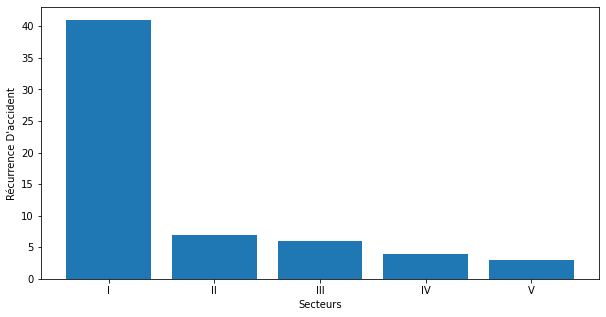

count     61
unique     5
top        I
freq      41
Name: Accident Level, dtype: object 

Graphe representant la récurrence d'accidents par secteur pour le Dimanche


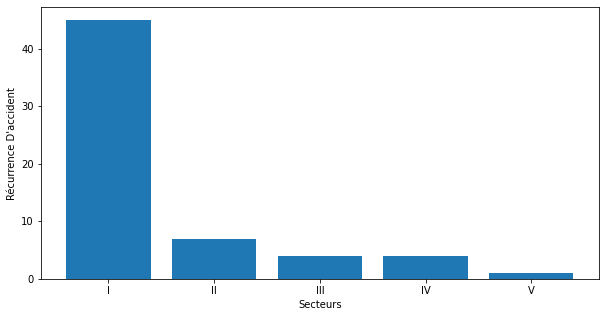

count     61
unique     5
top        I
freq      45
Name: Accident Level, dtype: object 

Graphe representant la récurrence d'accidents par secteur pour le Lundi


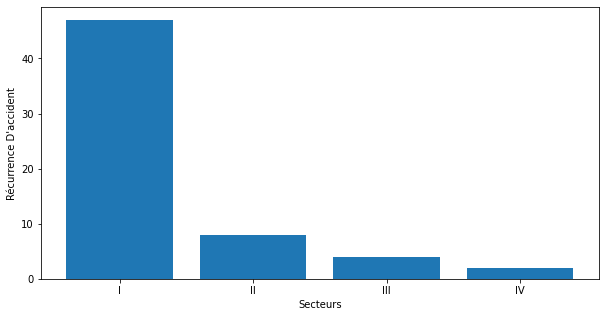

count     61
unique     4
top        I
freq      47
Name: Accident Level, dtype: object 

Graphe representant la récurrence d'accidents par secteur pour le Mardi


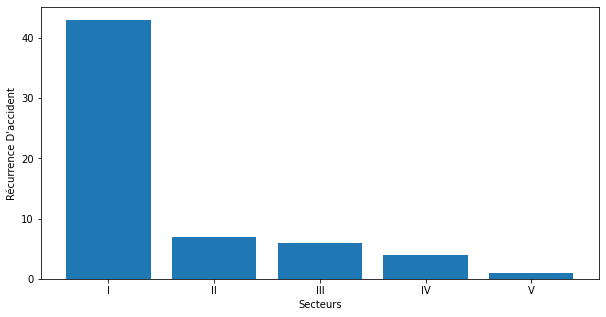

count     61
unique     5
top        I
freq      43
Name: Accident Level, dtype: object 

Graphe representant la récurrence d'accidents par secteur pour le Mercredi


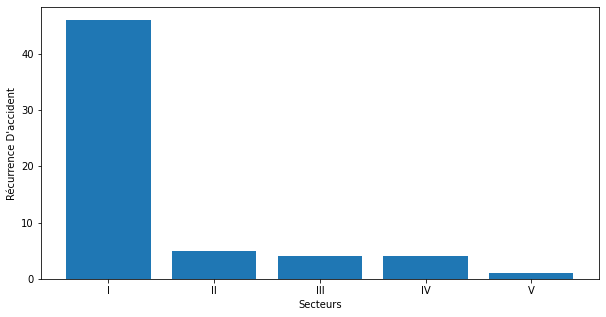

count     60
unique     5
top        I
freq      46
Name: Accident Level, dtype: object 

Graphe representant la récurrence d'accidents par secteur pour le Jeudi


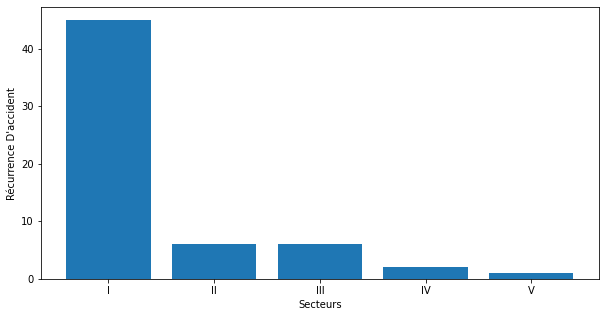

count     60
unique     5
top        I
freq      45
Name: Accident Level, dtype: object 



In [16]:
#Selections des jours :
jours = ['Vendredi', 'Samedi','Dimanche','Lundi','Mardi','Mercredi','Jeudi']
df2['Jour']=df2['Data'].str[8:10]

j=0
for i in range(0,len(df2)):
    #print(df2['Jour'])
    df2.loc[i,['Jour']]=jours[j]
    j=j+1
    if(j>6):
        j=0
#Grouper par les jours :
secteurs = ['I','II','III','IV','V']
df_jours = pd.concat([df2['Accident Level'],df2['Jour']],axis = 1)


for day in jours :
    tempp =df_jours.loc[df2['Jour']== day].sort_values(by='Accident Level')
    plt.figure(figsize=(10,5))
    plt.bar([x for x in range(len(tempp['Accident Level'].value_counts()))],tempp['Accident Level'].value_counts())
    plt.xticks([x for x in range(len(tempp['Accident Level'].value_counts()))],secteurs[0:len(tempp['Accident Level'].value_counts())])
    plt.xlabel('Secteurs')
    plt.ylabel("Récurrence D'accident")
    print("Graphe representant la récurrence d'accidents par secteur pour le",day)
    plt.show()
    print(tempp['Accident Level'].describe(),'\n')


In [17]:
n.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
print(stopwords)

<WordListCorpusReader in '.../corpora/stopwords' (not loaded yet)>


# Relation entre le niveau et la description d'accidents :

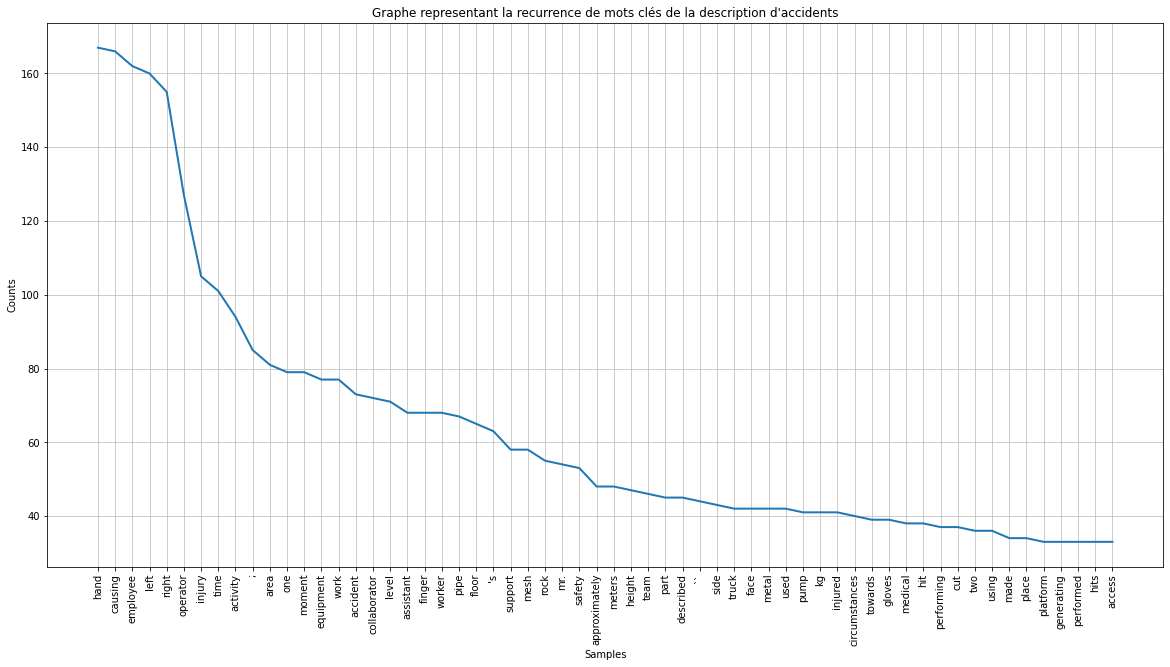

<Figure size 432x288 with 0 Axes>

In [20]:
secc = ['I','II','III','IV','V']
text = ''
for e in secc:
    #print(e)
    acc = df2.loc[:,['Accident Level','Description']].loc[df2['Accident Level'] == e]
    #print ('********************************************* Secteur : ',e,'*****************************************\n')
    for i in acc['Description']:
        text = text + ' \n' + i 
        #print(i,'\n')

#classer les mots de la description :
tokens = n.word_tokenize(text.lower())

#filtrer les mots usuels "stopwords" de notre token :

stop_words = set(stopwords.words('english'))
#ajouter les ponctuations:
stop_words.update(['.',',','the','of','and',"'",')','(','-'])
filtred_tokens = [x for x in tokens if  not x  in stop_words]

occurence_mots = n.FreqDist(filtred_tokens)
plt.figure(figsize=(20,10))
plt.title("Graphe representant la recurrence de mots clés de la description d'accidents")
occurence_mots.plot(60,cumulative = False)
plt.show()
plt.savefig("figure.png")

In [21]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures



bi_temp = BigramCollocationFinder.from_words(filtred_tokens)
bi_temp.nbest(BigramAssocMeasures.likelihood_ratio,100)

[('time', 'accident'),
 ('left', 'hand'),
 ('right', 'hand'),
 ('causing', 'injury'),
 ('da', 'silva'),
 ('medical', 'center'),
 ('employee', 'reports'),
 ('allergic', 'reaction'),
 ('injured', 'person'),
 ('split', 'set'),
 ('n', '°'),
 ('injury', 'described'),
 ('``', 'diameter'),
 ('finger', 'left'),
 ('described', 'injury'),
 ('manoel', 'da'),
 ('middle', 'finger'),
 ('support', 'mesh'),
 ('left', 'foot'),
 ('made', 'use'),
 ('upper', 'part'),
 ('degree', 'burn'),
 ('fragment', 'rock'),
 ('ring', 'finger'),
 ('wearing', 'safety'),
 ('area', '\u200b\u200bthe'),
 ('master', 'loader'),
 ('safety', 'gloves'),
 ('stilson', 'key'),
 ('index', 'finger'),
 ('4', '``'),
 ('transferred', 'medical'),
 ('soil', 'sampling'),
 ('time', 'event'),
 ('right', 'leg'),
 ('gives', 'access'),
 ('normal', 'activities'),
 ('lesion', 'described'),
 ('right', 'side'),
 ('line', 'fire'),
 ('recovery', 'boiler'),
 ('thermal', 'recovery'),
 ('enter', 'forest'),
 ('rotation', 'unit'),
 ('medical', 'service'),


In [22]:
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures



bi_temp = TrigramCollocationFinder.from_words([x for x in filtred_tokens if not x in ['accident']])
tri = bi_temp.nbest(TrigramAssocMeasures.likelihood_ratio,100)

tri_dist = n.FreqDist(tri)
#plt.figure(figsize=(20,10))
#tri.plot(100,cumulative = False)
tri

[('finger', 'left', 'hand'),
 ('finger', 'right', 'hand'),
 ('left', 'hand', 'causing'),
 ("'s", 'left', 'hand'),
 ('palm', 'left', 'hand'),
 ('back', 'left', 'hand'),
 ('fingers', 'left', 'hand'),
 ('left', 'hand', 'generating'),
 ('causing', 'injury', 'described'),
 ('thumb', 'left', 'hand'),
 ('wrist', 'left', 'hand'),
 ('strike', 'left', 'hand'),
 ('holding', 'left', 'hand'),
 ('left', 'hand', 'pressed'),
 ('left', 'hand', 'employee'),
 ('left', 'hand', 'bar'),
 ('chirodactile', 'left', 'hand'),
 ('left', 'hand', '..'),
 ('left', 'hand', '10:25'),
 ('left', 'hand', 'command'),
 ('left', 'hand', 'connector'),
 ('left', 'hand', 'die'),
 ('left', 'hand', 'injuring'),
 ('left', 'hand', 'inspecting'),
 ('left', 'hand', 'volvo'),
 ('quirodactilo', 'left', 'hand'),
 ('strips', 'left', 'hand'),
 ('glove', 'left', 'hand'),
 ('pressing', 'left', 'hand'),
 ('wound', 'left', 'hand'),
 ('onto', 'left', 'hand'),
 ('left', 'hand', 'structure'),
 ('hit', 'left', 'hand'),
 ('left', 'hand', 'cloths'

# ML

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


score =  0.7674418604651163


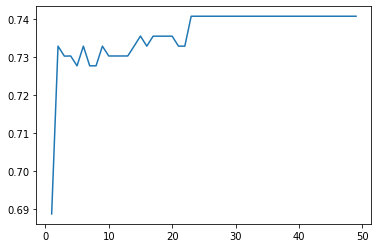

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,validation_curve
from sklearn.metrics import accuracy_score
import joblib
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

#Ajouter les differentes Colonnes pour améliorer de plus l'entrainement du model :
df2['Pays']=df2['Countries'].str[-1]
X=pd.concat([df2['Genre'],df2['Accident Level'],df2['Potential Accident Level']],axis = 1)


#Genre to int:
    
i=0
for x in X['Genre']:
    if X['Genre'][i] == 'Male':
        X['Genre'][i] =1
    else:
        X['Genre'][i]=2
    i=i+1
    
#Accident level to int:

i=0
for x in X['Accident Level']:
    if X['Accident Level'][i] == 'I':
        X['Accident Level'][i] =1
    if X['Accident Level'][i] == 'II':
        X['Accident Level'][i] =2
    if X['Accident Level'][i] == 'III':
        X['Accident Level'][i] =3
    if X['Accident Level'][i] == 'IV':
        X['Accident Level'][i] =4
    if X['Accident Level'][i] == 'V':
        X['Accident Level'][i] =5
    i=i+1

#Potential Accident Level to int:
i=0
for x in X['Potential Accident Level']:
    if X['Potential Accident Level'][i] == 'I':
        X['Potential Accident Level'][i] =1
    if X['Potential Accident Level'][i] == 'II':
        X['Potential Accident Level'][i] =2
    if X['Potential Accident Level'][i] == 'III':
        X['Potential Accident Level'][i] =3
    if X['Potential Accident Level'][i] == 'IV':
        X['Potential Accident Level'][i] =4
    if X['Potential Accident Level'][i] == 'V':
        X['Potential Accident Level'][i] =5
    if X['Potential Accident Level'][i] == 'VI':
        X['Potential Accident Level'][i] =6
    i=i+1
#Local to int :
i=0 
# for x in X['Industry Sector']:
#     if X['Industry Sector'][i]=='Mining':
#         X['Industry Sector'][i]=1
#     if X['Industry Sector'][i]=='Metals':
#         X['Industry Sector'][i]=2
#     if X['Industry Sector'][i]=='Others':
#         X['Industry Sector'][i]=3
#     i=i+1
    

Y=X['Accident Level']

X=X.drop(columns='Accident Level')

Y=Y.astype('int')

#entrainement et test du model :
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1)
#model = DecisionTreeClassifier()
#model.fit(X_train,Y_train)

# prediction = model.predict(X_test)
# score= accuracy_score(Y_test,prediction)
# score
model = KNeighborsClassifier()
train_val, val_score= validation_curve(model,X_train,Y_train,'n_neighbors',np.arange(1,50),cv=5)
plt.plot(np.arange(1,50),val_score.mean(axis=1))
#cross_val_score(KNeighborsClassifier(50),X_train,Y_train,cv=5,scoring='accuracy')
model.fit(X_train,Y_train)
prediction=model.predict(X_test)
score=accuracy_score(Y_test,prediction)
print("score = ",score)

In [39]:
tokens

['while',
 'removing',
 'the',
 'drill',
 'rod',
 'of',
 'the',
 'jumbo',
 '08',
 'for',
 'maintenance',
 ',',
 'the',
 'supervisor',
 'proceeds',
 'to',
 'loosen',
 'the',
 'support',
 'of',
 'the',
 'intermediate',
 'centralizer',
 'to',
 'facilitate',
 'the',
 'removal',
 ',',
 'seeing',
 'this',
 'the',
 'mechanic',
 'supports',
 'one',
 'end',
 'on',
 'the',
 'drill',
 'of',
 'the',
 'equipment',
 'to',
 'pull',
 'with',
 'both',
 'hands',
 'the',
 'bar',
 'and',
 'accelerate',
 'the',
 'removal',
 'from',
 'this',
 ',',
 'at',
 'this',
 'moment',
 'the',
 'bar',
 'slides',
 'from',
 'its',
 'point',
 'of',
 'support',
 'and',
 'tightens',
 'the',
 'fingers',
 'of',
 'the',
 'mechanic',
 'between',
 'the',
 'drilling',
 'bar',
 'and',
 'the',
 'beam',
 'of',
 'the',
 'jumbo',
 '.',
 'during',
 'the',
 'activation',
 'of',
 'a',
 'sodium',
 'sulphide',
 'pump',
 ',',
 'the',
 'piping',
 'was',
 'uncoupled',
 'and',
 'the',
 'sulfide',
 'solution',
 'was',
 'designed',
 'in',
 'the'